# Determination of the periastron/apoastron of null geodesics in Schwarzschild spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

Click [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/ges_null_periastron.ipynb) to download the notebook file (ipynb format). To run it, you must start SageMath with `sage -n jupyter`.

In [1]:
version()

'SageMath version 9.0, Release Date: 2020-01-01'

In [2]:
%display latex

## The cubic polynomial

In [3]:
r, b, m = var('r b m', domain='real')

In [4]:
P(r, b, m) = r^3 - b^2*r + 2*m*b^2
P(r, b, m)

2*b^2*m - b^2*r + r^3

## Roots via Viète's trigonometric method

In [5]:
r0 = 2/sqrt(3)*b*cos(pi/3 - arccos(3*sqrt(3)*m/b)/3)
r0

2/3*sqrt(3)*b*cos(1/3*pi - 1/3*arccos(3*sqrt(3)*m/b))

In [6]:
P(r0, b, m).simplify_full().trig_reduce()

0

In [7]:
r1 = 2/sqrt(3)*b*cos(pi - arccos(3*sqrt(3)*m/b)/3)
r1

2/3*sqrt(3)*b*cos(pi - 1/3*arccos(3*sqrt(3)*m/b))

In [8]:
P(r1, b, m).simplify_full().trig_reduce()

0

In [9]:
r2 = 2/sqrt(3)*b*cos(5*pi/3 - arccos(3*sqrt(3)*m/b)/3)
r2

2/3*sqrt(3)*b*cos(5/3*pi - 1/3*arccos(3*sqrt(3)*m/b))

In [10]:
P(r2, b, m).simplify_full().trig_reduce()

0

In [11]:
rm(b) = r1.subs({m: 1})
rp(b) = r0.subs({m: 1})
ra(b) = r2.subs({m: 1})

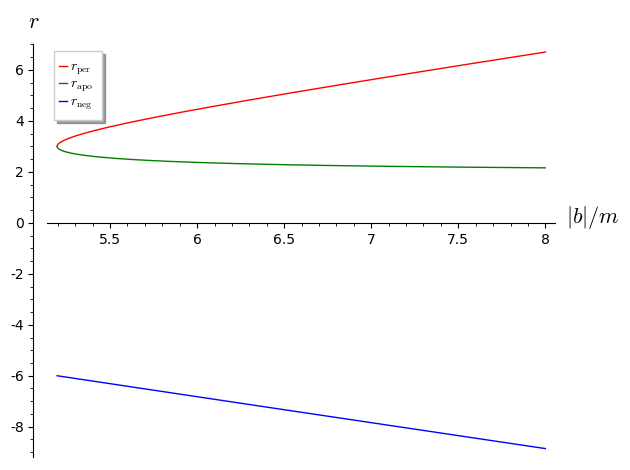

In [12]:
g = plot(rp(b), (b, 3*sqrt(3), 8), color='red', legend_label=r'$r_{\rm per}$',
         axes_labels=[r'$|b|/m$', r'$r$']) \
    + plot(ra(b), (b, 3*sqrt(3), 8), color='green', legend_label=r'$r_{\rm apo}$') \
    + plot(rm(b), (b, 3*sqrt(3), 8), color='blue', legend_label=r'$r_{\rm neg}$')
g

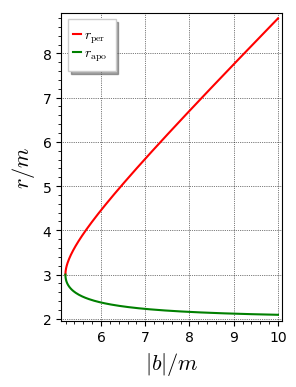

In [13]:
g = plot(rp(b), (b, 3*sqrt(3), 10), color='red', thickness=1.5,
         legend_label=r'$r_{\rm per}$', axes_labels=[r'$|b|/m$', r'$r/m$'], 
         frame=True, gridlines=True, aspect_ratio=1) \
    + plot(ra(b), (b, 3*sqrt(3), 10), color='green', thickness=1.5,
           legend_label=r'$r_{\rm apo}$')
g

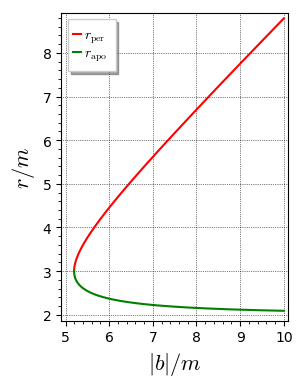

In [14]:
show(g, xmin=5, ymin=2)

In [15]:
g.save('ges_null_per_apo.pdf', xmin=5, ymin=2)

## Expansions close to $b_{\rm crit}$

### Expansion of the form $b = b_{\rm crit} + x$

In [16]:
bcrit = 3*sqrt(3)

In [17]:
rpx = rp(bcrit + x).taylor(x, 0, 2)
rpx

59/972*3^(1/4)*sqrt(2)*x^(3/2) - 4/2187*x^2 + 1/3*3^(3/4)*sqrt(2)*sqrt(x) + 8/27*sqrt(3)*x + 3

In [18]:
rax = ra(bcrit + x).taylor(x, 0, 2)
rax

-59/972*3^(1/4)*sqrt(2)*x^(3/2) - 4/2187*x^2 - 1/3*3^(3/4)*sqrt(2)*sqrt(x) + 8/27*sqrt(3)*x + 3

In [19]:
upx = (1/rpx).taylor(x, 0, 2)
upx

61/8748*3^(1/4)*sqrt(2)*x^(3/2) + 49/19683*x^2 - 1/27*3^(3/4)*sqrt(2)*sqrt(x) - 2/243*sqrt(3)*x + 1/3

In [20]:
uax = (1/rax).taylor(x, 0, 2)
uax

-61/8748*3^(1/4)*sqrt(2)*x^(3/2) + 49/19683*x^2 + 1/27*3^(3/4)*sqrt(2)*sqrt(x) - 2/243*sqrt(3)*x + 1/3

### Expansion of the form $u_{\rm per} = \frac{1}{3} (1 - x)$

In [21]:
up = (1 - x)/3

In [22]:
bx = 1/(up*sqrt(1 - 2*up)).simplify_full()
bx

-3/((x - 1)*sqrt(2/3*x + 1/3))

In [23]:
upx = (1/rp(bx)).simplify_full().taylor(x, 0, 3)
upx

-1/3*x + 1/3

In [24]:
P(1/upx, bx, 1).simplify_full()

0

In [25]:
uax = (1/ra(bx)).simplify_full().taylor(x, 0, 3)
uax

4/27*x^3 - 2/9*x^2 + 1/3*x + 1/3

In [26]:
P(1/uax, bx, 1).simplify_full().taylor(x, 0, 3)

0

In [27]:
umx = (1/rm(bx)).simplify_full().taylor(x, 0, 3)
umx

-4/27*x^3 + 2/9*x^2 - 1/6

In [28]:
P(1/umx, bx, 1).simplify_full().taylor(x, 0, 3)

0

Another check:

In [29]:
umx + upx + uax

1/2